In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("shark_tank_cleaned.csv")

In [3]:
# Select relevant columns
features = ['Industry', 'Pitchers City', 'Pitchers State', 'Original Ask Amount',
            'Original Offered Equity', 'Valuation Requested', 'Number of Presenters']
target = 'Received Offer'

# Encode categorical variables
df_model = df[features + [target]].copy()
label_encoders = {}
for col in ['Industry', 'Pitchers City', 'Pitchers State']:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le

# Split data
X = df_model[features]
y = df_model[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


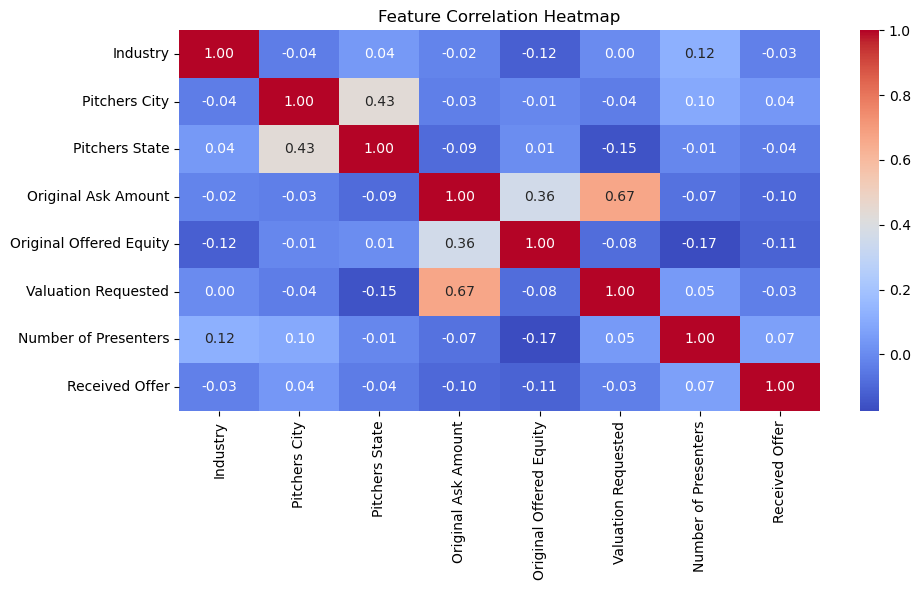

In [4]:
plt.figure(figsize=(10,6))
sns.heatmap(df_model.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

In [5]:
# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

# Decision Tree
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)
tree_preds = tree_model.predict(X_test)

In [6]:
def evaluate_model(name, y_true, y_pred):
    print(f"\nModel: {name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print(classification_report(y_true, y_pred))

evaluate_model("Logistic Regression", y_test, log_preds)
evaluate_model("Decision Tree", y_test, tree_preds)


Model: Logistic Regression
Accuracy: 0.6896551724137931
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.69      1.00      0.82        40

    accuracy                           0.69        58
   macro avg       0.34      0.50      0.41        58
weighted avg       0.48      0.69      0.56        58


Model: Decision Tree
Accuracy: 0.6379310344827587
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.67      0.93      0.78        40

    accuracy                           0.64        58
   macro avg       0.34      0.46      0.39        58
weighted avg       0.46      0.64      0.54        58



C:\Users\AMURTHA G\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\AMURTHA G\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\AMURTHA G\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


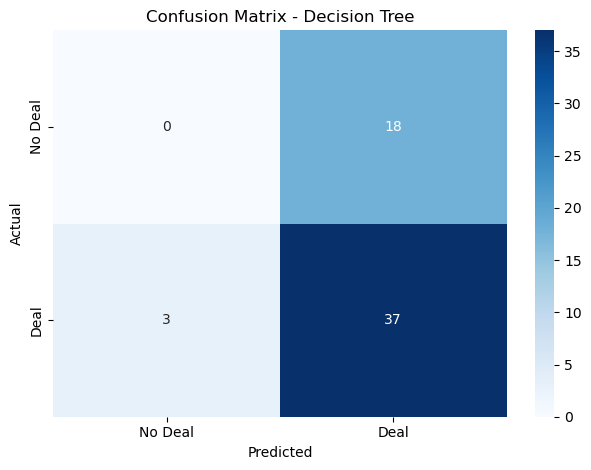

In [7]:
best_preds = tree_preds
cm = confusion_matrix(y_test, best_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["No Deal", "Deal"], yticklabels=["No Deal", "Deal"])
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

C:\Users\AMURTHA G\AppData\Local\Temp\ipykernel_26300\396185217.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=features_sorted.values, y=features_sorted.index, palette="Set2")


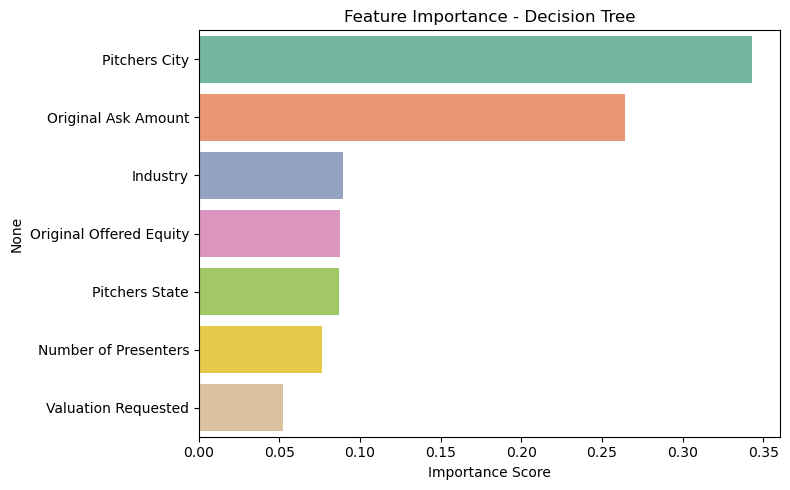

In [8]:
importance = tree_model.feature_importances_
features_sorted = pd.Series(importance, index=features).sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=features_sorted.values, y=features_sorted.index, palette="Set2")
plt.title("Feature Importance - Decision Tree")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

- Decision Tree performed slightly better than Logistic Regression.
- Important features: `Original Ask Amount`, `Offered Equity`, and `Industry`.
- Model can be used to predict funding potential based on startup traits.